In [572]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn
from pprint import pp

# Package to implement Decision Tree Model
import sklearn
models = [("tree", "DecisionTreeClassifier"), ("ensemble", "RandomForestClassifier"), ("ensemble", "AdaBoostClassifier")]
from sklearn.ensemble import VotingClassifier
  
# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

need_mapie = False


In [573]:
df = pd.read_csv("fetal_health.csv")


In [574]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [575]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [576]:
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']
X_encoded = pd.get_dummies(X)
X_encoded.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [577]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state=565)

def get_models(model_list: list[tuple[str, str]]) -> list[tuple]:
  import sys
  tuples = []
  for data in model_list:
    sub_module_str, model_str = data
    model = getattr(sys.modules[f"sklearn.{sub_module_str}"], model_str)(random_state = 565)
    tuples.append((f"{model.__class__.__name__}", model))
  return tuples

og_models = get_models(models)
print(og_models)


[('DecisionTreeClassifier', DecisionTreeClassifier(random_state=565)), ('RandomForestClassifier', RandomForestClassifier(random_state=565)), ('AdaBoostClassifier', AdaBoostClassifier(random_state=565))]


In [578]:

for name, model in og_models:
  import time
  start = time.time()
  model.fit(train_X, train_y)
  stop = time.time()
  print(f"{name}: \n\r\tTraining time: {stop - start}s")

DecisionTreeClassifier: 
	Training time: 0.011999130249023438s
RandomForestClassifier: 
	Training time: 0.26112794876098633s
AdaBoostClassifier: 
	Training time: 0.14201879501342773s


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [579]:
import sklearn.metrics


models_with_y_pred = []
f1_scores = []
for name, model in og_models:
  # Predict Test Set
  y_pred = model.predict(test_X)

  # Evaluate the model on test set
  r2 = sklearn.metrics.r2_score(test_y, y_pred)
  f1_score = sklearn.metrics.f1_score(test_y, y_pred, average='micro')
  RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
  print(f'{name}: \n\r\tR-squared on Test Set: {r2:0.2f}\n\r\tRoot-Mean-squared on Test Set: {RMSE_test:0.2f}\n\r\tF1 Score: {f1_score:f}')
  models_with_y_pred.append((name, {"y_pred": y_pred, "model": model, 'f1_score': f1_score}))
  f1_scores.append(f1_score)
models = models_with_y_pred

# pp(models)

DecisionTreeClassifier: 
	R-squared on Test Set: 0.73
	Root-Mean-squared on Test Set: 0.31
	F1 Score: 0.922535
RandomForestClassifier: 
	R-squared on Test Set: 0.80
	Root-Mean-squared on Test Set: 0.27
	F1 Score: 0.934272
AdaBoostClassifier: 
	R-squared on Test Set: 0.39
	Root-Mean-squared on Test Set: 0.47
	F1 Score: 0.859155


In [580]:
# Normalize the F1 scores
weighted_f1_scores = (np.array(f1_scores) / np.linalg.norm(np.array(f1_scores))).tolist()
for f1_score, data_with_name in zip(weighted_f1_scores, models):
  name, data = data_with_name
  data['f1_score'] = f1_score

# pp(models)

In [581]:
# Add Soft Voting Classifier

vot = VotingClassifier(og_models, voting='soft', weights=weighted_f1_scores)
start = time.time()
vot.fit(train_X, train_y)
stop = time.time()
print(f"VotingClassifier: \n\r\tTraining time: {stop - start}s")

VotingClassifier: 
	Training time: 0.41599512100219727s


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [582]:
# Catch up the Soft Voting Classifier with the rest of the models
name = vot.__class__.__name__
y_pred = vot.predict(test_X)

# Evaluate the model on test set
r2 = sklearn.metrics.r2_score(test_y, y_pred)
f1_score = sklearn.metrics.f1_score(test_y, y_pred, average='micro')
RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
models.append((name, {"y_pred": y_pred, "model": vot, 'f1_score': f1_score}))
print(f'{name}: \n\r\tR-squared on Test Set: {r2:0.2f}\n\r\tRoot-Mean-squared on Test Set: {RMSE_test:0.2f}\n\r\tF1 Score: {f1_score:f}')

VotingClassifier: 
	R-squared on Test Set: 0.73
	Root-Mean-squared on Test Set: 0.31
	F1 Score: 0.922535


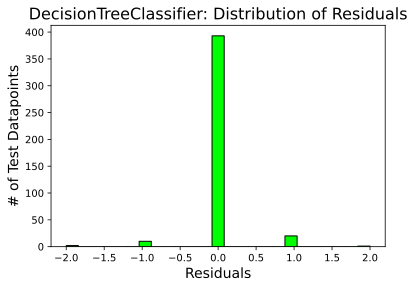

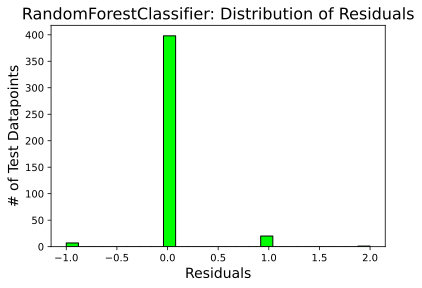

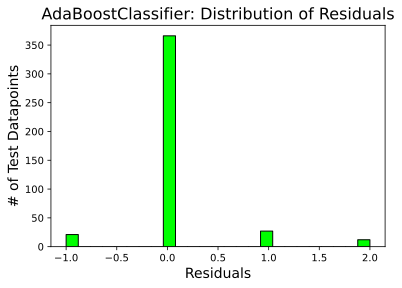

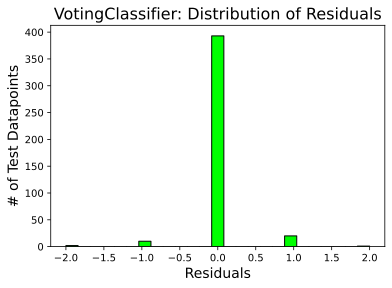

In [583]:
for name, data in models:
  # Calculate the residuals by subtracting the predicted values from the actual test values
  all_residuals = test_y - data["y_pred"]

  # Set up the figure with custom size and resolution (DPI)
  plt.figure(figsize=(6, 4), dpi = 150)

  # Plot the histogram of residuals
  plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

  # Label X and Y axes
  plt.xlabel('Residuals', fontsize = 14)
  plt.ylabel('# of Test Datapoints', fontsize = 14)

  # Set the title of the plot
  plt.title(f'{name}: Distribution of Residuals', fontsize = 16)

  # Adjust the font size of x and y ticks
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10);
  plt.savefig(f"{name}_residual_plot.svg")

RandomForestClassifier: Not Applicable
AdaBoostClassifier: Not Applicable
VotingClassifier: Not Applicable


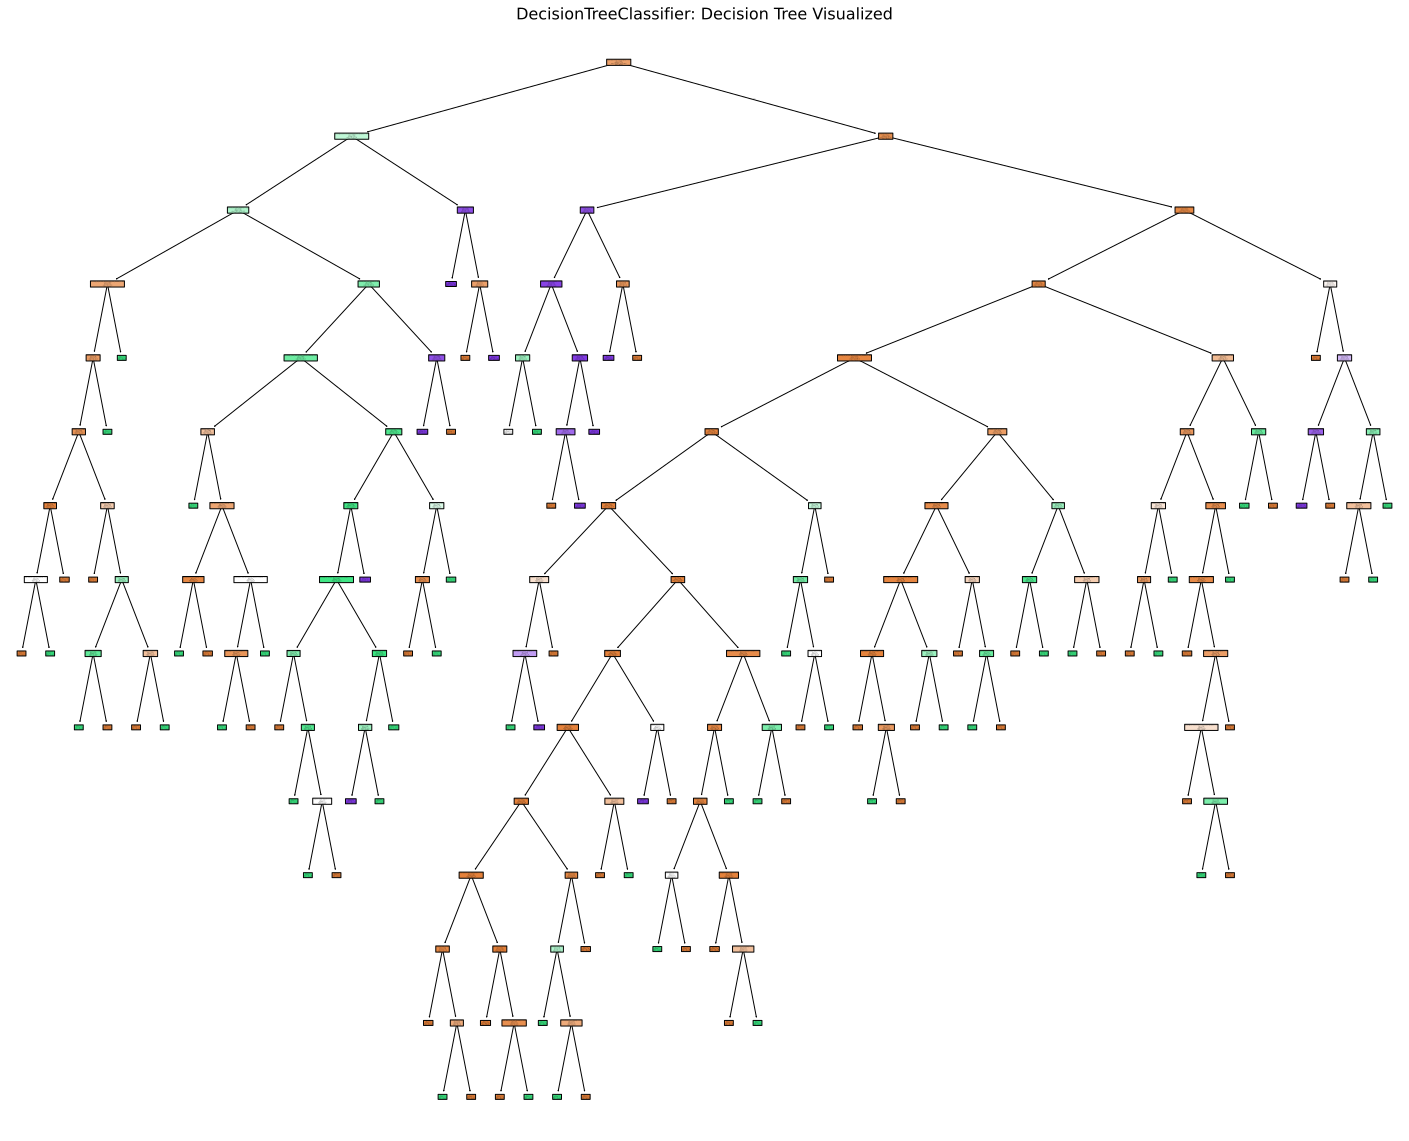

In [584]:
labels = ["Normal", "Suspect", "Pathological"]
for name, data in models:
  model_name = data['model'].__class__.__name__
  if model_name == "DecisionTreeClassifier":
    # Visualizing trained decision tree model
    fig = plt.figure(figsize = (25,20))
    a = tree.plot_tree(decision_tree = data['model'],
                      max_depth = None,
                      feature_names = train_X.columns,
                      class_names = labels,
                      filled = True)
    
    plt.title(f'{name}: Decision Tree Visualized', fontsize = 16)

    # Saving Decision Tree
    fig.savefig("DecisionTreeClassifier_visual.svg", bbox_inches = 'tight')
  else:
    print(f"{name}: Not Applicable")

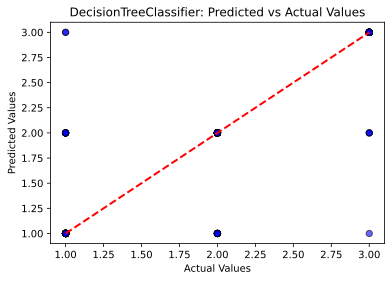

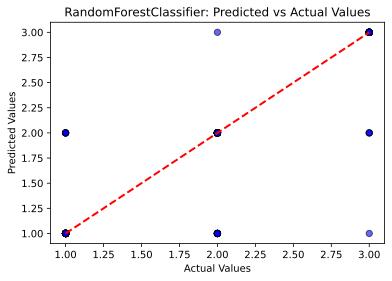

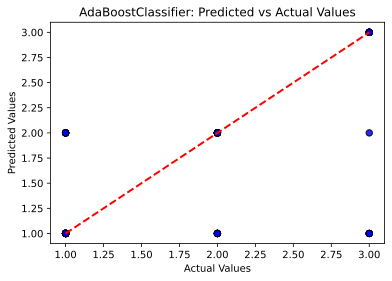

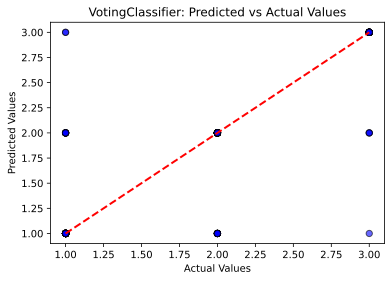

In [585]:
for name, data in models:  
  # Setting the figure size and resolution
  plt.figure(figsize = (6, 4), dpi = 150)

  # Scatter plot of actual vs predicted values
  plt.scatter(test_y, data['y_pred'], color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

  # 45-degree reference line (perfect predictions)
  plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

  # Axis labels and title
  plt.xlabel('Actual Values', fontsize = 10)
  plt.ylabel('Predicted Values', fontsize = 10)
  plt.title(f'{name}: Predicted vs Actual Values', fontsize = 12)

  # Adjust ticks
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10);
  plt.savefig(f'{name}_pred_vs_actual.svg')

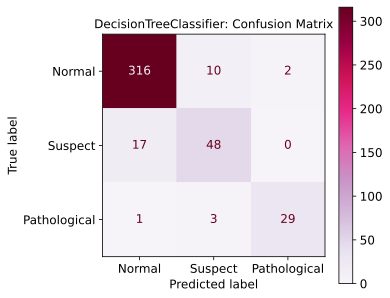

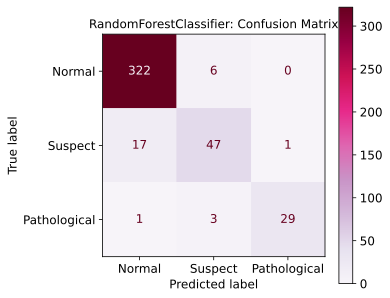

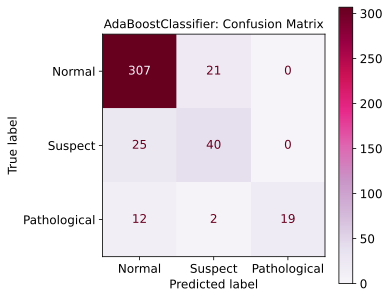

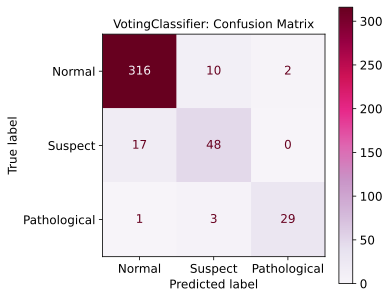

In [586]:
for name, data in models:
  y_pred = data['y_pred']

  cm = confusion_matrix(test_y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= labels)
  fig, ax = plt.subplots(figsize = (5, 5))
  ax.set_title(f'{name}: Confusion Matrix', fontsize = 12)
  plt.rcParams.update({'font.size': 12})

  disp.plot(cmap = 'PuRd', ax = ax)
  disp.figure_.savefig(f"{name}_confusion_mat.svg")

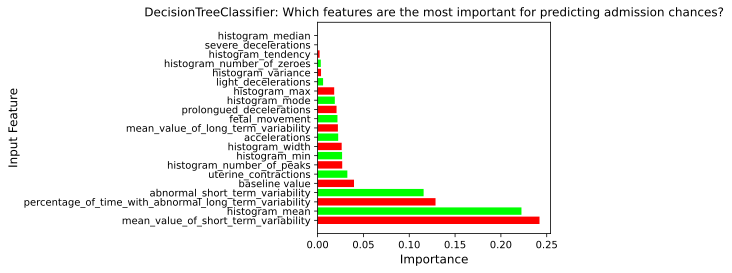

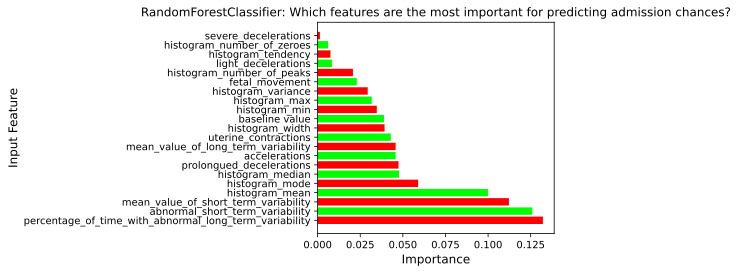

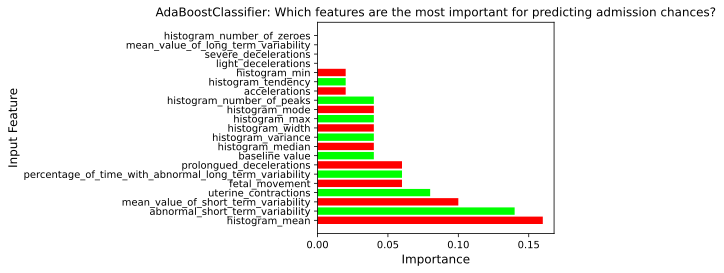

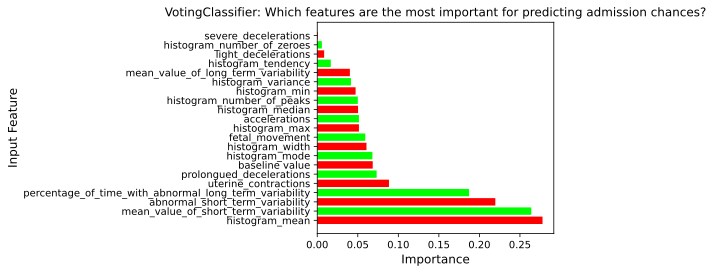

In [ ]:
for name, data in models:
  model = data['model']
  if not not hasattr(model, "feature_importances_"):
    # reg = data['model']
    # y_pred = data['y_pred']
    # Storing importance values from the trained model
    importance = data['model'].feature_importances_

    # Storing feature importance as a dataframe
    feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                  columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


    # Bar plot
    plt.figure(figsize=(8, 4))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

    plt.xlabel("Importance", fontsize = 12)
    plt.ylabel("Input Feature", fontsize = 12)
    plt.title(f'{name}: Which features are the most important for predicting admission chances?', fontsize = 12) 
    plt.yticks(fontsize = 10) # fontsize of yticks
    plt.xticks(fontsize = 10) # fontsize of xticks

    plt.tight_layout();
    plt.savefig(f"{name}_feature_imp.svg")
  else:
    model: VotingClassifier = data['model']
    weights = model.get_params()['weights']
    columns = ['Feature']
    data = []
    for estimator in model.estimators_:
      columns.append(f"{estimator.__class__.__name__} Importance")
    for feature in train_X.columns.tolist():
      d = [feature]
      for _ in range(len(columns) - 1):
        d.append(0.0)
      data.append(d)
    feature_imp = pd.DataFrame(data, columns = columns)
    for estimator, weight in zip(model.estimators_, weights):
      for i, importance in enumerate(estimator.feature_importances_):
        weighted_importance = importance * weight
        feature_imp.loc[i, f"{estimator.__class__.__name__} Importance"] = weighted_importance
    feature_imp.drop(columns = ['Feature'], inplace = True)
    importance = feature_imp.sum(axis=1).tolist()

    feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                  columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


    # Bar plot
    plt.figure(figsize=(8, 4))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

    plt.xlabel("Importance", fontsize = 12)
    plt.ylabel("Input Feature", fontsize = 12)
    plt.title(f'{name}: Which features are the most important for predicting admission chances?', fontsize = 12) 
    plt.yticks(fontsize = 10) # fontsize of yticks
    plt.xticks(fontsize = 10) # fontsize of xticks

    plt.tight_layout();
    plt.savefig(f"{name}_feature_imp.svg")
      

In [588]:
for name, data in models:
  y_pred = data['y_pred']
  # Generating Classification Report
  report = classification_report(test_y, y_pred, output_dict = True)
  report_df = pd.DataFrame(report)
  print(f'\n\r{name}: Classification Report:\n\r')
  print(report_df)

  # Save the report as a CSV File
  report_df.to_csv(f'{name}_class_report.csv')


DecisionTreeClassifier: Classification Report:

                  1.0        2.0        3.0  accuracy   macro avg  \
precision    0.946108   0.786885   0.935484  0.922535    0.889492   
recall       0.963415   0.738462   0.878788  0.922535    0.860221   
f1-score     0.954683   0.761905   0.906250  0.922535    0.874279   
support    328.000000  65.000000  33.000000  0.922535  426.000000   

           weighted avg  
precision      0.920990  
recall         0.922535  
f1-score       0.921516  
support      426.000000  

RandomForestClassifier: Classification Report:

                  1.0        2.0        3.0  accuracy   macro avg  \
precision    0.947059   0.839286   0.966667  0.934272    0.917670   
recall       0.981707   0.723077   0.878788  0.934272    0.861191   
f1-score     0.964072   0.776860   0.920635  0.934272    0.887189   
support    328.000000  65.000000  33.000000  0.934272  426.000000   

           weighted avg  
precision      0.932133  
recall         0.934272  
f1

In [589]:
if need_mapie: 
  for name, data in models:
    from mapie.regression import MapieRegressor
    # Define MAPIE regressor
    reg = data['model']
    y_pred = data['y_pred']
    mapie = MapieRegressor(estimator = reg, # Prediction model to use
                          n_jobs = -1,
                          random_state = 565)

    # Fit mapie regressor on training data
    start = time.time()  
    mapie.fit(train_X, train_y)
    stop = time.time()             
    print(f"{reg.__class__.__name__}: \n\r\tTraining time: {stop - start}s")

    alpha = 0.1 # For 90% confidence level

    # Use mapie.predict() to get predicted values and intervals
    y_test_pred, y_test_pis = mapie.predict(test_X, alpha = alpha)
    data['mapie'] = mapie
    data['y_test_pred'] = y_test_pred
    data['y_test_pis'] = y_test_pis

In [590]:
if need_mapie: 
  for data in models:
    y_test_pred = data['y_test_pred']
    y_test_pis = data['y_test_pis']
    # Storing results in a dataframe
    # print(test_y)
    predictions = test_y.to_frame()
    # print(predictions)
    predictions.columns = ['Actual Value']
    predictions["Predicted Value"] = y_test_pred.round(2)
    predictions["Lower Value"] = y_test_pis[:, 0].round(2)
    predictions["Upper Value"] = y_test_pis[:, 1].round(2)

    # Store in dict
    data['predictions'] = predictions

    # Take a quick look
    print(f'\n\r\n\r{data['model'].__class__.__name__} Predictions:')
    print(predictions.tail(5))
    

In [591]:
if need_mapie: 
  for data in models:
    from mapie.metrics import regression_coverage_score
    y_test_pis = data['y_test_pis']
    coverage = regression_coverage_score(test_y,           # Actual values
                                        y_test_pis[:, 0], # Lower bound of prediction intervals
                                        y_test_pis[:, 1]) # Upper bound of prediction intervals

    coverage_percentage = coverage * 100
    print(f"{data['model'].__class__.__name__} Coverage: {coverage_percentage:.2f}%")
    data['coverage'] = coverage
    data['coverage_percentage'] = coverage_percentage

In [592]:
if need_mapie: 
  for data in models:
    predictions = data['predictions']
    coverage_percentage = data['coverage_percentage']
    # Sort the predictions by 'Actual Value' for better visualization and reset the index
    sorted_predictions = predictions.sort_values(by=['Actual Value']).reset_index(drop=True)

    # Create a figure and axis object with specified size and resolution
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the actual values with green dots
    plt.plot(sorted_predictions["Actual Value"], 'go', markersize=3, label="Actual Value")

    # Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
    plt.fill_between(np.arange(len(sorted_predictions)),
                    sorted_predictions["Lower Value"],
                    sorted_predictions["Upper Value"],
                    alpha=0.2, color="green", label="Prediction Interval")

    # Set font size for x and y ticks
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Set the limit for the x-axis to cover the range of samples
    plt.xlim([0, len(sorted_predictions)])

    # Label the x-axis and y-axis with appropriate font size
    plt.xlabel("Samples", fontsize=10)
    plt.ylabel("Target", fontsize=10)

    # Add a title to the plot, including the coverage percentage, with bold formatting
    plt.title(f"{data['model'].__class__.__name__} Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

    # Add a legend to the plot, placed in the upper left, with specified font size
    plt.legend(loc="upper left", fontsize=10);
    plt.savefig(f'{data['model'].__class__.__name__}_coverage.svg')

In [ ]:
for name, data in models:
  if need_mapie: 
    with open(f"{name}.pickle", "wb") as f:
      pickle.dump(data['mapie'], f)
  else:
    with open(f"{name}.pickle", "wb") as f:
      pickle.dump(data['model'], f)